# CLUSTERING USING K-MEANS ALGORITHM
_**Develop a program to apply k-Means algorithm to cluster a set of instances on an appropriate dataset**_

In [2]:
# Import required packages

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Retrieval & Preparation of Data

This experiment uses Olivetti faces dataset containing face images taken between April 1992 and April 1994 at AT&T Laboratories, Cambridge. There are ten different images for each of 40 distinct faces totaling 400 images. The images were taken at different times, varying lighting conditions, facial expressions (open or closed eyes, smiling or not smiling) and facial details (glasses or no glasses).

The original dataset consisted of 92 x 112, while the version available here consists of 64x64 images.

The image is quantized to 256 grey levels and stored as unsigned 8-bit integers. The loader will convert these to floating point values on the interval [0, 1], which are easier to work with for many algorithms.

Preview of the faces is available at https://www.cl.cam.ac.uk/research/dtg/attarchive/facesataglance.html.

In [5]:
# Downloads Olivetti faces dataset

# NOTE: Downloading this data for the first time will several seconds to complete
olivetti = fetch_olivetti_faces()

In [6]:
# Checks the shape of the dataset
print(olivetti.data.shape)

(400, 4096)


In [7]:
# The "target" for this database is an integer from 0 to 39 indicating the identity of the person pictured.

print(olivetti.target)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

In [8]:
# Splits dataset into train and test set containing 90% and 10% instances, respectively.

X_train, X_test, y_train, y_test = train_test_split(
    olivetti.data, olivetti.target, test_size=0.10, random_state=42, stratify=olivetti.target)

In [9]:
# Further seperates around 20% (80) of the instances from train set as validation set.

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=80, random_state=42, stratify=y_train)

In [10]:
# Prints the shape of training, validation and test dataset.
print("Shape of train dataset:", X_train.shape)
print("Shape of validation dataset:", X_val.shape)
print("Shape of test dataset:", X_test.shape)

Shape of train dataset: (280, 4096)
Shape of validation dataset: (80, 4096)
Shape of test dataset: (40, 4096)


## Analyzing Principal Components to Reduce Dimensionality of the Datasets

In [12]:
# Creates PCA instance to analyze principal components of data set such that these can explain 99% of variance of the data.
pca = PCA(n_components=0.99)

# Fits the principal component analyzer on the train set
pca.fit(X_train)

# Gets the reduced dataset for train, validation and test set
X_train_reduced = pca.transform(X_train)
X_val_reduced = pca.transform(X_val)
X_val_test = pca.transform(X_test)

In [13]:
# Checks the number of principal components
print("Number of principal components: ", pca.n_components_)

Number of principal components:  200


In [14]:
# Calculates required space

# It is defined as ratio between the number of principal components that describes 
# the given variance and number of dimentions of the original dataset

required_space = pca.n_components_ / olivetti.data.shape[1] * 100
print("Required space: {0:.2f}%".format(required_space))

Required space: 4.88%


In [15]:
# Calculates compression

print("Compression: {0:.2f}%".format(100 - required_space))

Compression: 95.12%


## Finding Optimal Number of Clusters

### Using Silhouette Score to Find Best Number of Clusters

One of the techniques to choose best value for the number of cluster is to use silhouette score. The following steps computes silhouette scores for different numbers of clusters to help deciding the optimal number of clusters.

**1. Models with different number of clusters are created.**

In [20]:
# Arbitrary range from 5 to 150 with step 5 are considered for number of clusters.
# In this case total 30 (150 / 5) different k values are prepared.
k_range = range(5, 155, 5)

**2. In an iteration, all 30 models with different k value are created.**

In [22]:
models = []          # Models based on specific 'k' value will be stored here for later reference

for k in k_range:    # Value for k will be 5, then 10, then 15, and so on till 150
    print("Creating model with k = {0}...".format(k), end="")
    k_means = KMeans(n_clusters=k, random_state=42)           # Model gets initialized
    k_means.fit(X_train_reduced)                              # Model gets fitted on the data
    models.append(k_means)                                    # Fitted model gets added into a list for later reference
    print("Done")

Creating model with k = 5...Done
Creating model with k = 10...Done
Creating model with k = 15...Done
Creating model with k = 20...Done
Creating model with k = 25...Done
Creating model with k = 30...Done
Creating model with k = 35...Done
Creating model with k = 40...Done
Creating model with k = 45...Done
Creating model with k = 50...Done
Creating model with k = 55...Done
Creating model with k = 60...Done
Creating model with k = 65...Done
Creating model with k = 70...Done
Creating model with k = 75...Done
Creating model with k = 80...Done
Creating model with k = 85...Done
Creating model with k = 90...Done
Creating model with k = 95...Done
Creating model with k = 100...Done
Creating model with k = 105...Done
Creating model with k = 110...Done
Creating model with k = 115...Done
Creating model with k = 120...Done
Creating model with k = 125...Done
Creating model with k = 130...Done
Creating model with k = 135...Done
Creating model with k = 140...Done
Creating model with k = 145...Done
Creat

**3. Each models' performance is analyzed.**

In [24]:
# List to store silhouette score for all models
silhouette_scores = []

# Iterates over all models and stores the models' performance (silhouette score) into a list for later reference
for model in models:
    silhouette_scores.append(
        silhouette_score(X_train_reduced, model.labels_)    # Calculates silhouette score given the dataset and labels
    )

**4. Plots the performance of all the models with different _k_ value.**

In [26]:
# Model with highest silhouette score is considered best model

best_score_index = np.argmax(silhouette_scores)    # Stores the index of list containing the highest silhouette score

best_score = silhouette_scores[best_score_index]   # Gets the highest silhousette score

best_k = k_range[best_score_index]                 # Gets the k-value of the model with highest silhouette score

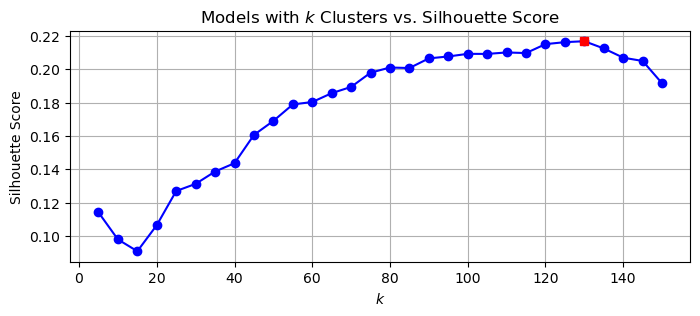

In [27]:
# Plots the silhouette score for each model

plt.figure(figsize=(8, 3))                                   # Sets figures size (in inches) accordingly
plt.plot(k_range, silhouette_scores, "bo-")                  # Plots silhouette score for all models in blue line with filled circles
plt.xlabel("$k$")                                            # Prints label (in italic) for x-axis 
plt.ylabel("Silhouette Score")                               # Prints label for y-axis
plt.plot(best_k, best_score, "rs")  # Draws a red square     # Plots just the score for the best model in red square
plt.grid()                                                   # Enables grid layout
plt.title("Models with $k$ Clusters vs. Silhouette Score")   # Prints the title of the plot
plt.show()                                                   # Renders the plot

In [28]:
# Prints the best number of cluster.
print("Best Number of Cluster:", best_k)

Best Number of Cluster: 130


The number of clusters is quite high as against intuition that to be around 40 considering the later one being the number of people that the dataset has the pictures of.

### Analyzing Intertia over Different Number of Clusters

In [31]:
# Stores inertia for each model [inertia gets computed by the model itself]
inertias = [model.inertia_ for model in models]

# Stores inertia of the model having the highest silhouette score
best_model_inertia = inertias[best_score_index]

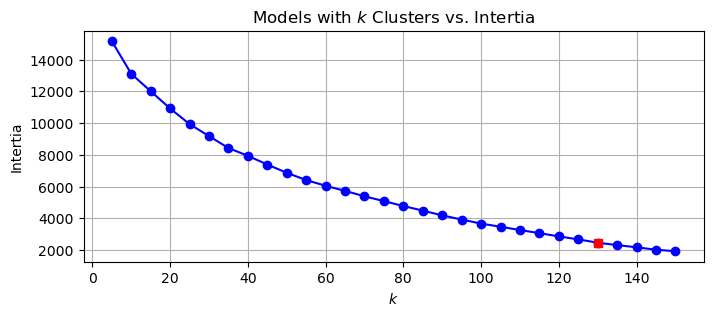

In [32]:
# Plots inertia for all models

plt.figure(figsize=(8, 3))                          # Sets figures size (in inches) accordingly
plt.plot(k_range, inertias, "bo-")                  # Plots inertia for all models in blue line with filled circles
plt.xlabel("$k$")                                   # Prints label (in italic) for x-axis 
plt.ylabel("Intertia")                              # Prints label for y-axis
plt.plot(best_k, best_model_inertia, "rs")          # Plots just the inertia for the best model in red square
plt.title("Models with $k$ Clusters vs. Intertia")  # Prints the title of the plot
plt.grid()                                          # Enables grid layout
plt.show()                                          # Renders the plot

In [33]:
# As there is not clear elbow visible in the above diagram, best model is considered
# the one with the best number of clusters found.
best_model = models[best_score_index]

## Visualizing the Clusters

In [35]:
def plot_faces(faces, labels, n_cols=10):
    """
    Helper function to plot the faces.
    
    Parameters
    ----------
    faces : 2-D array-like
        One or more faces across rows where each row represents a face
        
    labels : 1d array-like
        Ground truth (correct) labels.
        
    n_cols : int, default=10
        Numer of columns to be used to plot faces. It is maxium number of faces to be plotted in a row.
    """
    
    faces = faces.reshape(-1, 64, 64)  # Reshapes from one to two dimensions to make image plotting easy
    
    # Calculates number of rows requires to print all faces in cluster when maximum number of columns is n_cols
    n_rows = (len(faces) - 1) // n_cols + 1  
    
    plt.figure(figsize=(n_cols, n_rows))   # Configures the figure size as required
    
    # Iterates over all faces with labels
    for index, (face, label) in enumerate(zip(faces, labels)):
        # References subplots in a figure and selects a subplot indicates by 3rd parameter (1-based index)
        plt.subplot(n_rows, n_cols, index+1)
        
        plt.imshow(face, cmap="gray")  # Shows the face in the plot selected in the previous step        
        plt.axis("off")                # Axes are made off for asthetics
        plt.title(label)               # Writes face's origial label as title of the selected plot
        
    plt.show()

Cluster 0


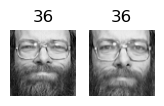

Cluster 1


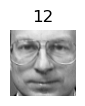

Cluster 2


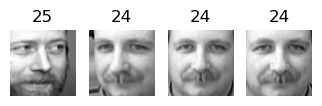

Cluster 3


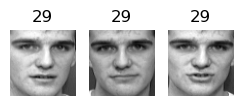

Cluster 4


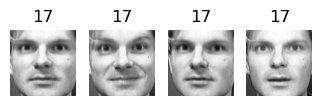

Cluster 5


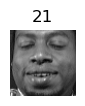

Cluster 6


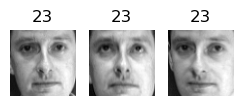

Cluster 7


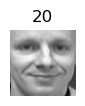

Cluster 8


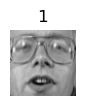

Cluster 9


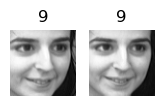

Cluster 10


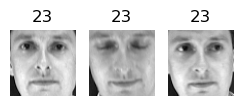

Cluster 11


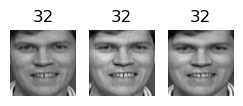

Cluster 12


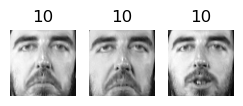

Cluster 13


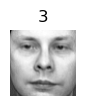

Cluster 14


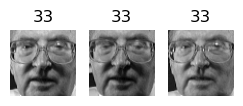

Cluster 15


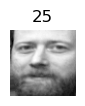

Cluster 16


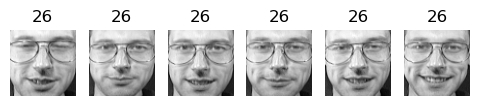

Cluster 17


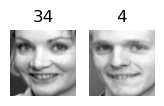

Cluster 18


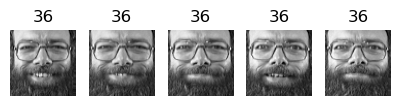

Cluster 19


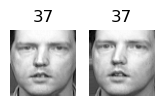

Cluster 20


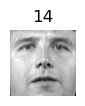

Cluster 21


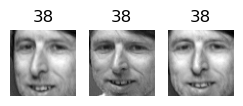

Cluster 22


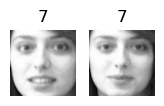

Cluster 23


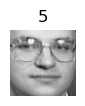

Cluster 24


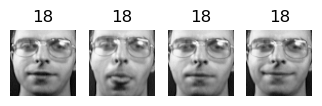

Cluster 25


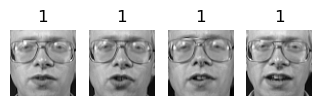

Cluster 26


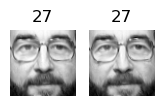

Cluster 27


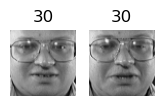

Cluster 28


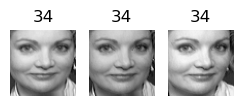

Cluster 29


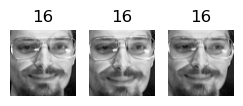

Cluster 30


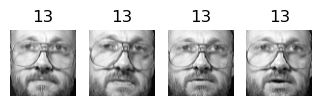

Cluster 31


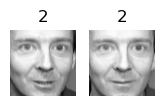

Cluster 32


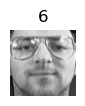

Cluster 33


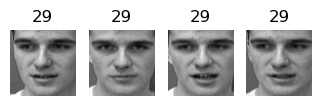

Cluster 34


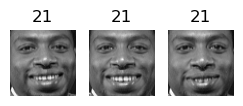

Cluster 35


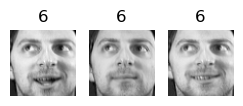

Cluster 36


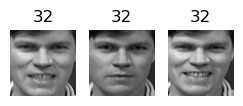

Cluster 37


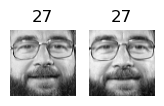

Cluster 38


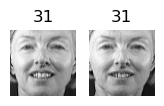

Cluster 39


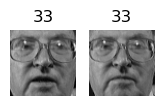

Cluster 40


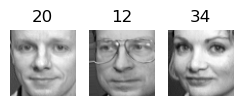

Cluster 41


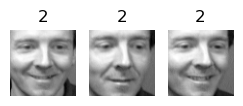

Cluster 42


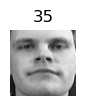

Cluster 43


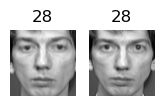

Cluster 44


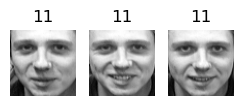

Cluster 45


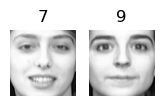

Cluster 46


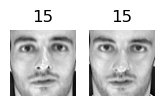

Cluster 47


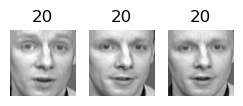

Cluster 48


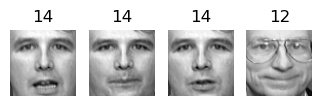

Cluster 49


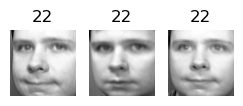

Cluster 50


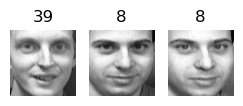

Cluster 51


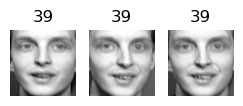

Cluster 52


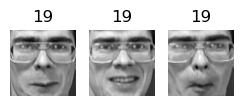

Cluster 53


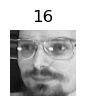

Cluster 54


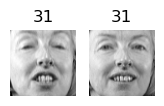

Cluster 55


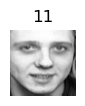

Cluster 56


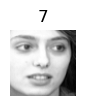

Cluster 57


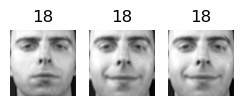

Cluster 58


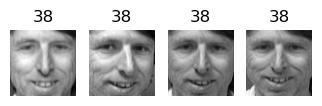

Cluster 59


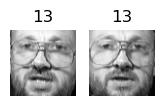

Cluster 60


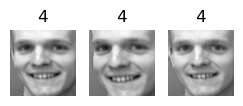

Cluster 61


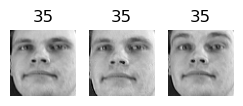

Cluster 62


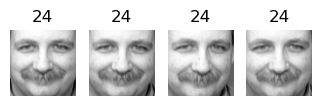

Cluster 63


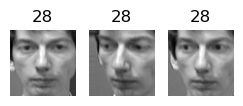

Cluster 64


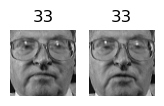

Cluster 65


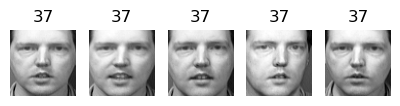

Cluster 66


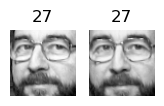

Cluster 67


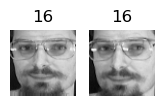

Cluster 68


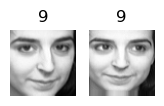

Cluster 69


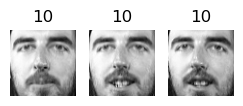

Cluster 70


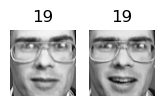

Cluster 71


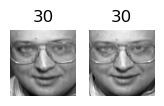

Cluster 72


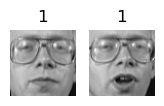

Cluster 73


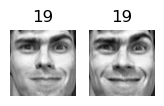

Cluster 74


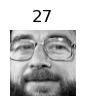

Cluster 75


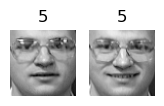

Cluster 76


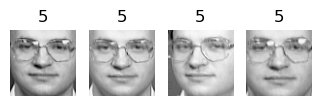

Cluster 77


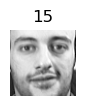

Cluster 78


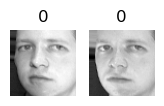

Cluster 79


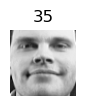

Cluster 80


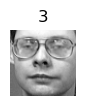

Cluster 81


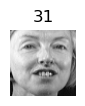

Cluster 82


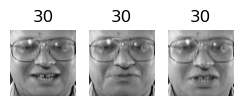

Cluster 83


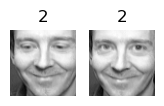

Cluster 84


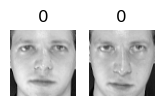

Cluster 85


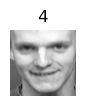

Cluster 86


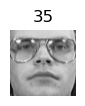

Cluster 87


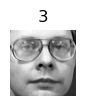

Cluster 88


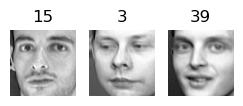

Cluster 89


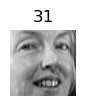

Cluster 90


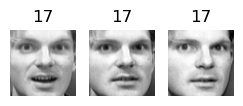

Cluster 91


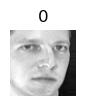

Cluster 92


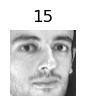

Cluster 93


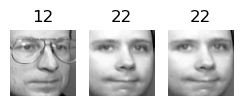

Cluster 94


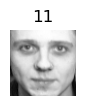

Cluster 95


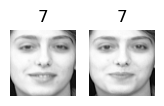

Cluster 96


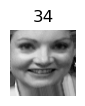

Cluster 97


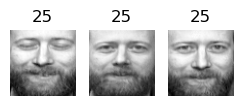

Cluster 98


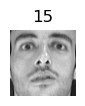

Cluster 99


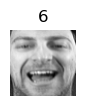

Cluster 100


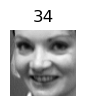

Cluster 101


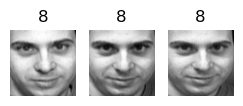

Cluster 102


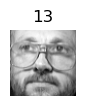

Cluster 103


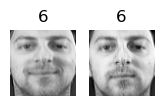

Cluster 104


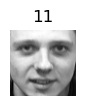

Cluster 105


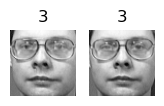

Cluster 106


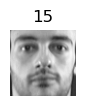

Cluster 107


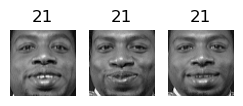

Cluster 108


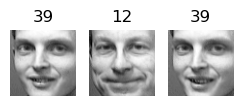

Cluster 109


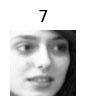

Cluster 110


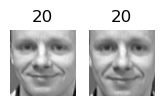

Cluster 111


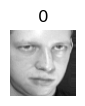

Cluster 112


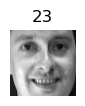

Cluster 113


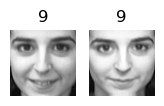

Cluster 114


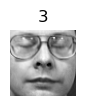

Cluster 115


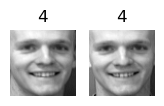

Cluster 116


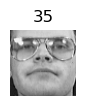

Cluster 117


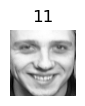

Cluster 118


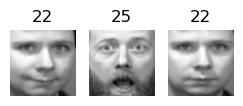

Cluster 119


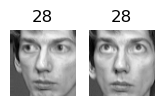

Cluster 120


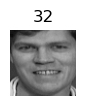

Cluster 121


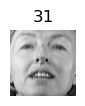

Cluster 122


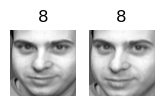

Cluster 123


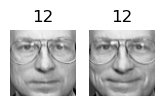

Cluster 124


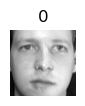

Cluster 125


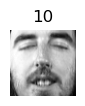

Cluster 126


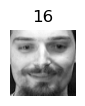

Cluster 127


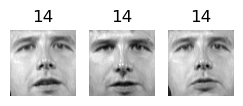

Cluster 128


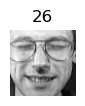

Cluster 129


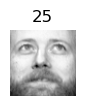

In [36]:
# Iterates over all the clusters the best model found; Cluster ID is 0-based index.
for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)   # Prints ID the cluster before showing all faces in it
    
    # Stores indexes of the instances in the current cluster (i.e. indexes of all faces in cluster 0)
    # It is an list with size equal to all the faces the model has clustered
    # It contains either True or False 
    indexes = best_model.labels_ == cluster_id
    
    # Extracts the faces only for a specific cluster mentioned by cluster_id
    faces = X_train[indexes]    # X_train instead of X_train_reduced being used show original face
    labels = y_train[indexes]   # Stores the original labels just to be used in visualization
    
    # Plots the faces for a specific cluster
    plot_faces(faces, labels)

**Observations:**
1. Centroid-based algorithm k-Means was used for clustering for the given dataset.
2. Instead of using all the original dimensions given in the dataset, dimensionality reduction was applied using algorithm PCA to extract principal components that can explain 99% of the variance of the dataset.
3. As the dataset comes with targets, the best number of clusters is already known and it is equal to the number of the persons having their images in the dataset. While finding optimal number of clusters with just the (reduced) features in unsupervised learning setting, the number came out to be 130.
4. This number is on the higher side as compared to our intuition for the optimal number of clusters to be equal to the number of people the dataset is having images for.
5. Silhouette score was used as a metric to find the best number of clusters. In this approach, a number of models with different k-value (indicating number of clusters) were created and silhouette score for each of these were recorded for analysis. Silhouette score was highest when number of clusters was 130.
6. Inertia of all the models were also analyzed and no prominent elbow was observed while plotting inertia against each model with increasing k-value leaving no option to consider any other k-value other than the found one.
7. At the end, all images across all found clusters were plotted with their actual labels and it was noticed that
    - except for the few, mostly clusters contain images of the same person, and
    - number of faces in a clusters varies
8. Just clustering the images this way may not be useful directly, but it could save a lot of time when labeling images from just a few labeled images in an semi-supervised learning setting. 